In [1]:
#Importing lib's
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#Loading the data
enriched_file = r"S:\Sem_4\Output\enriched_lake_data.xlsx"
trends_file = r"S:\Sem_4\Output\statistical_results_summary.xlsx"

df_enriched = pd.read_excel(enriched_file)
df_trends = pd.read_excel(trends_file, sheet_name="1. Seasonal Trends")

In [5]:
#Standardize column names
df_enriched.columns = [c.lower().replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_') for c in df_enriched.columns]

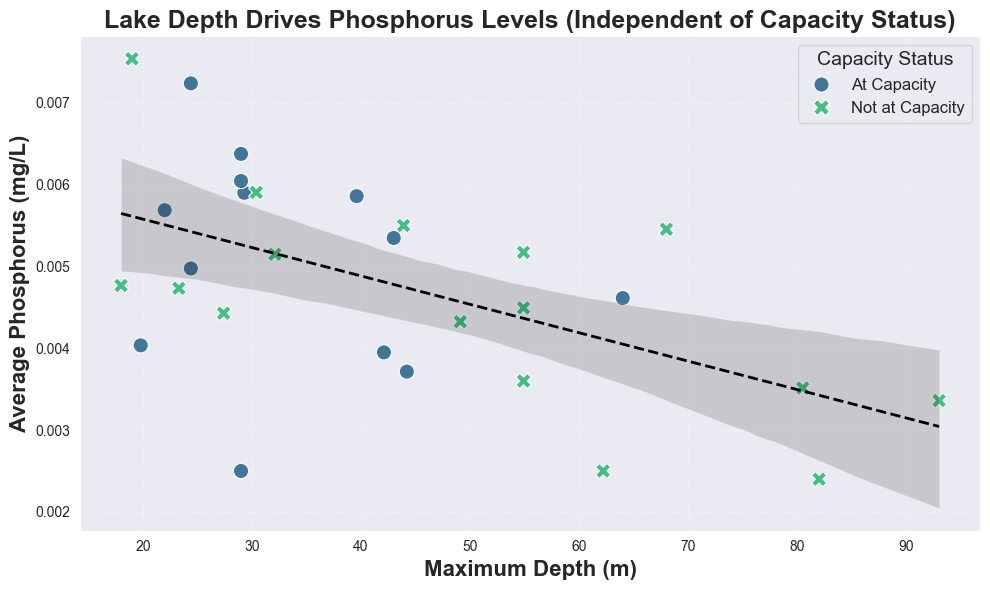

In [12]:
#PLOT 1: Scatter Plot
#Filtering data: Remove rows without depth/phosphorus and the "mixed" status category
plot_data = df_enriched.dropna(subset=['max_depth_m', 'average_phosphorus_mg_l', 'capacity_status_2016'])
plot_data = plot_data[plot_data['capacity_status_2016'] != 'Not at Capacity/At Capacity']

plt.figure(figsize=(10, 6))

#Ploting the data points, colored by their Capacity Status
sns.scatterplot(
    data=plot_data,
    x='max_depth_m',
    y='average_phosphorus_mg_l',
    hue='capacity_status_2016',
    style='capacity_status_2016',
    s=120,
    palette='viridis',
    alpha=0.9
)

#Adding a single regression trendline to show Depth is the main driver
sns.regplot(
    data=plot_data,
    x='max_depth_m',
    y='average_phosphorus_mg_l',
    scatter=False,
    color='black',
    line_kws={'linestyle':'--', 'linewidth': 2, 'label': 'Depth Trend'}
)

#Formatting for Poster
plt.title('Lake Depth Drives Phosphorus Levels (Independent of Capacity Status)', fontsize=18, fontweight='bold')
plt.xlabel('Maximum Depth (m)', fontsize=16, fontweight='bold')
plt.ylabel('Average Phosphorus (mg/L)', fontsize=16, fontweight='bold')
plt.legend(title='Capacity Status', fontsize=12, title_fontsize=14)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
output_path = r'S:\Sem_4\Output\depth_scatter_plot.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

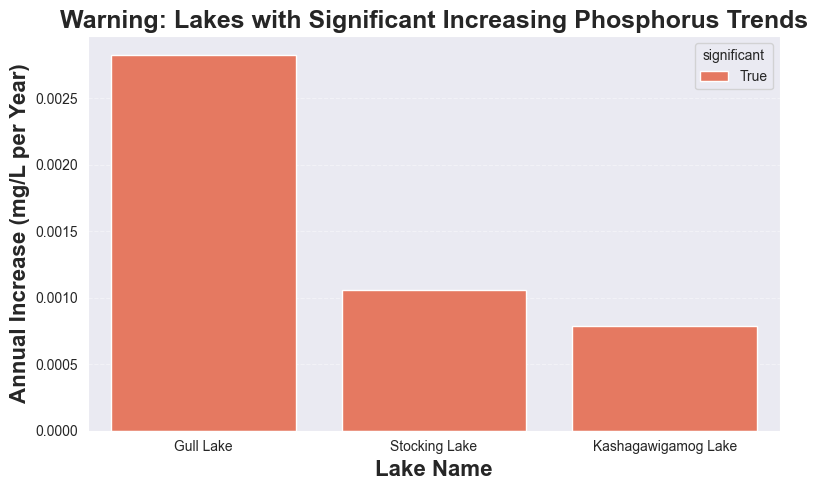

In [13]:
#PLOT 2: Bar Chart (Significant Trends)
#Filtering for significant increasing trends (P < 0.05 and Slope > 0)
sig_trends = df_trends[
    (df_trends['significant'] == True) &
    (df_trends['trend_slope_mgL_yr'] > 0) &
    (df_trends['n_obs'] > 6)
].sort_values('trend_slope_mgL_yr', ascending=False)

plt.figure(figsize=(8, 5))

#Creating Bar Plot
barplot = sns.barplot(
    data=sig_trends,
    x='lake_name',
    y='trend_slope_mgL_yr',
    palette='Reds_r',
    hue='significant'
)

#Formatting for Poster
plt.title('Warning: Lakes with Significant Increasing Phosphorus Trends', fontsize=18, fontweight='bold')
plt.ylabel('Annual Increase (mg/L per Year)', fontsize=16, fontweight='bold')
plt.xlabel('Lake Name', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
output_path = r'S:\Sem_4\Output\trends_bar.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()